<a href="https://colab.research.google.com/github/Cherow/independentprojectweek2_dscore/blob/main/week2_independent_project_moringaschool_datascince_core_mercy_cherotich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial Inclusion is a major problem in Africa since most people are not able to access financial services which include credit and payment which is measured by one having a bank account.
in this study we are trying to predict which individual are most likely to have or use a bank account.we are also showing the state of financial inclusion in Kenya,Rwanda ,Tanzania and Uganda while providing insight into some of the demographic factors that may drive indidual financial outcome and we achieve this through

1.Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question

2.Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.

3.Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.

4.Challenge your solution by providing insights on how you can make improvements.

---



---



1.Define 

the research problem is to predict which indidual is most likely to have or use a bank account

2.Metric of success

Being able to successfuly predict who is more likely to have or use bank account

3.Appropriateness of data available

The data availabe is adequate to answer question and hence make prediction

In [ ]:
#importing the libraries needed for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.Reading Dataset

In [7]:
#loading the dataset
Financial_df = pd.read_csv('/content/Financial Dataset - 1.csv')


## 3.Checking the dataset

In [8]:
#checking the number of records in our dataset
Financial_df.shape

(23524, 13)

In [9]:
#previewing the top records in the dataset
Financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
#previewing the bottom records in the dataset
Financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [12]:
#checking the unique values in each column
Financial_df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [14]:
#checking whether each column has the appropriate datatypr
Financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4.Tiding the data

In [15]:
#checking for null values
Financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [16]:
#removing the null values
Financial_nonull = Financial_df.dropna()
Financial_nonull.isnull().sum()
Financial_nonull.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [17]:
#checking and removing any duplicates
Financial_nonull.duplicated()
Financial_noduplicates = Financial_nonull.drop_duplicates()


In [26]:
#conveerting column into the right data type
Financial_noduplicates.info()
#date is not in the correct format so we convert it to Dateframe
#Financial_noduplicates['Year']= (Financial_noduplicates['Year']).astype(int)
#converting the household size to interger since it cant be float
#Financial_noduplicates['Household_Size'] = Financial_noduplicates['Household_Size'].astype(int)
Financial_noduplicates.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


(23343, 13)

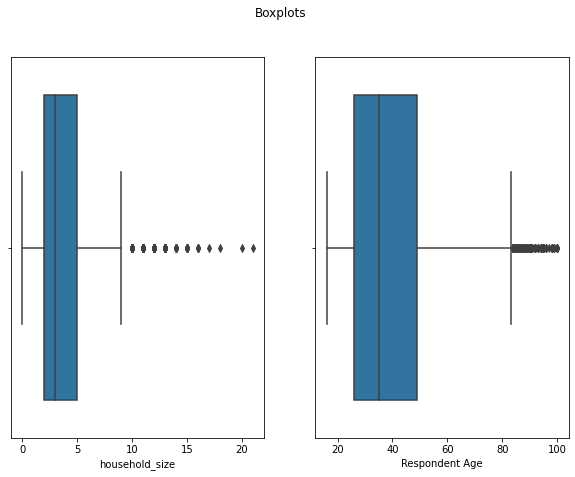

In [27]:
#checking for outliers
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot( x = Financial_noduplicates['household_size'],ax = ax1)
sns.boxplot( x = Financial_noduplicates['Respondent Age'],ax = ax2)
#the outliers in the household size and respondent age will be retained because that is a cause of variation in the dataset meaning there could be very old person or very large families

In [28]:
#renaming the column names since some columns are wrongly named and needs to be puncuated well
Financial_noduplicates.columns=['Country','Year','Uniqueid','Bank_Account','Type_Of_Location','Cellphone_Access','Household_Size','Respondent_Age','Gender_Of_Respondent','Relationship_Head','Marital_Status','Level_Of_Education','Type_Of_Job']

## Univariate Data Analsyis

In [128]:
Financial_yes = Financial_noduplicates[Financial_noduplicates['Bank_Account'] == 'Yes']
Financial_yes.head()


#creating frequency table for the categoricacal data
Financial_yes.Country.value_counts()
#kenya has the most number of people having bank account followed by Rwanda then Tanzania  and finally Uganda 
Financial_yes.Marital_Status.value_counts()
#married people recorded the highest number of people having bank account 
Financial_yes.Cellphone_Access.value_counts()
#people who had cellphone access had the highest number of having bank accounts
Financial_yes.Gender_Of_Respondent.value_counts()
#male had more access to bank account female
Financial_yes.Type_Of_Location.value_counts()
#people in the rural had more bank access than people in the urban
Financial_yes.Type_Of_Job.value_counts()
#the self employed had more access to bank account
Financial_yes.Level_Of_Education.value_counts()
#the people who had primary school education had more access to bank account
#Financial_yes.Relationship_Head.value_counts()
#the household heads had more access to bank account 


Head of Household      2259
Spouse                  695
Child                   193
Parent                   65
Other relative           65
Other non-relatives      20
Name: Relationship_Head, dtype: int64

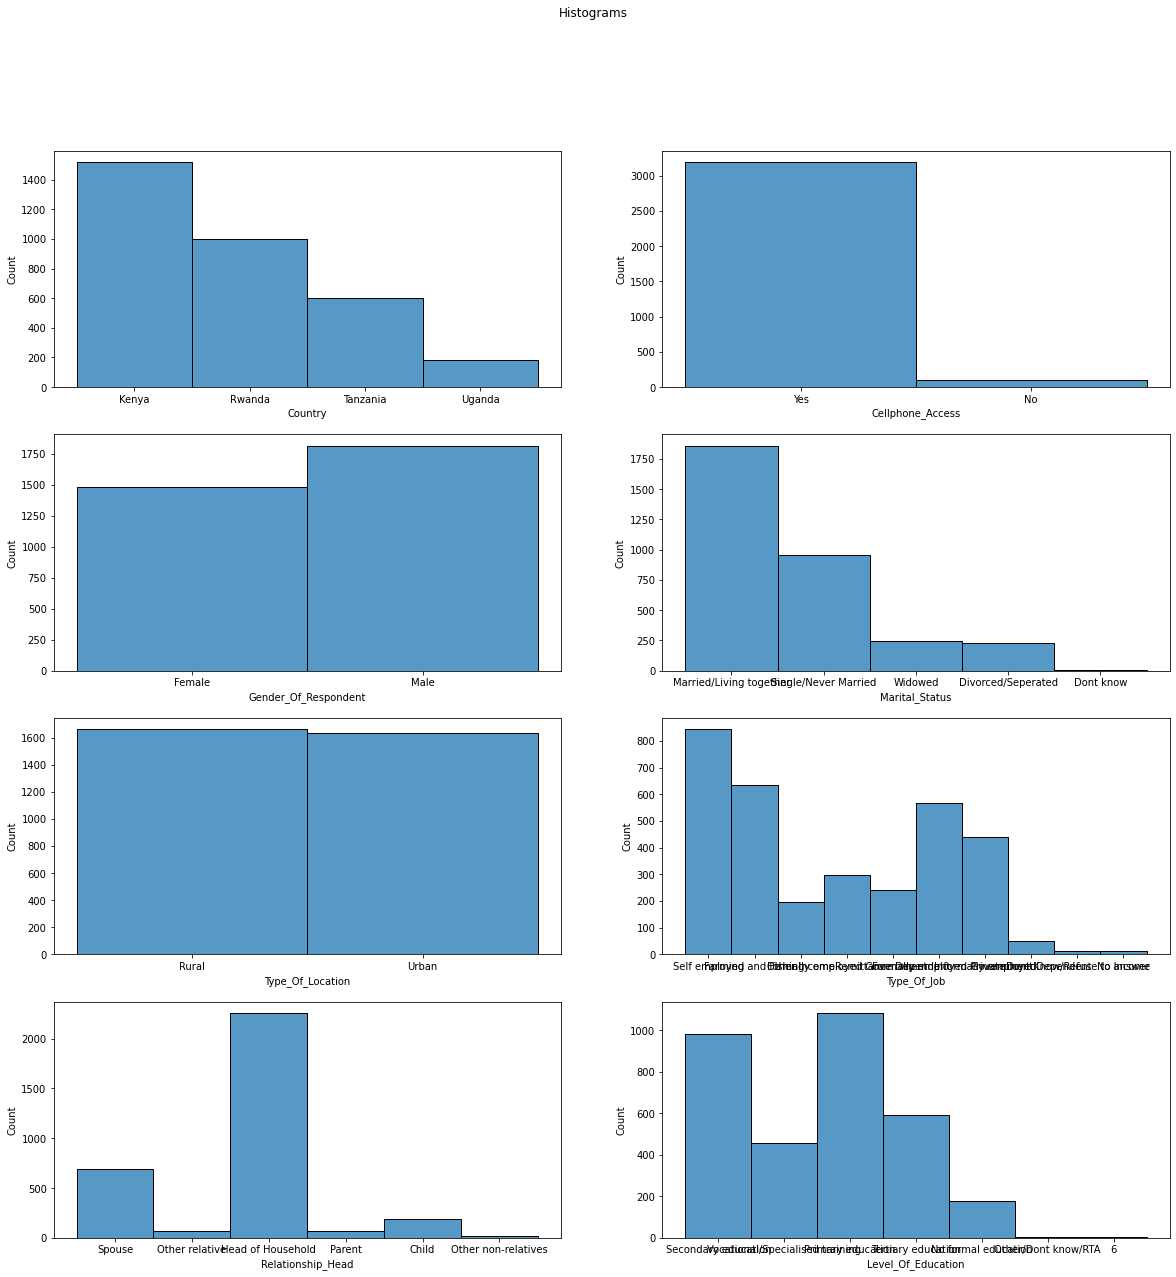

In [129]:
#visualisation of the frequency table for the categorical data which has access to bank account

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(20,20),)
fig.suptitle('Histograms')
sns.histplot(data=Financial_yes, x= 'Country',ax = ax1,binwidth=0.9)
sns.histplot(data=Financial_yes,x='Cellphone_Access',ax= ax2)
sns.histplot(data=Financial_yes,x='Gender_Of_Respondent',ax= ax3)
sns.histplot(data=Financial_yes,x='Marital_Status',ax=ax4)
sns.histplot(data=Financial_yes,x='Type_Of_Location',ax=ax5)
sns.histplot(data=Financial_yes,x='Type_Of_Job',ax = ax6)
sns.histplot(data=Financial_yes,x='Relationship_Head',ax =ax7)
sns.histplot(data=Financial_yes,x='Level_Of_Education',ax= ax8)


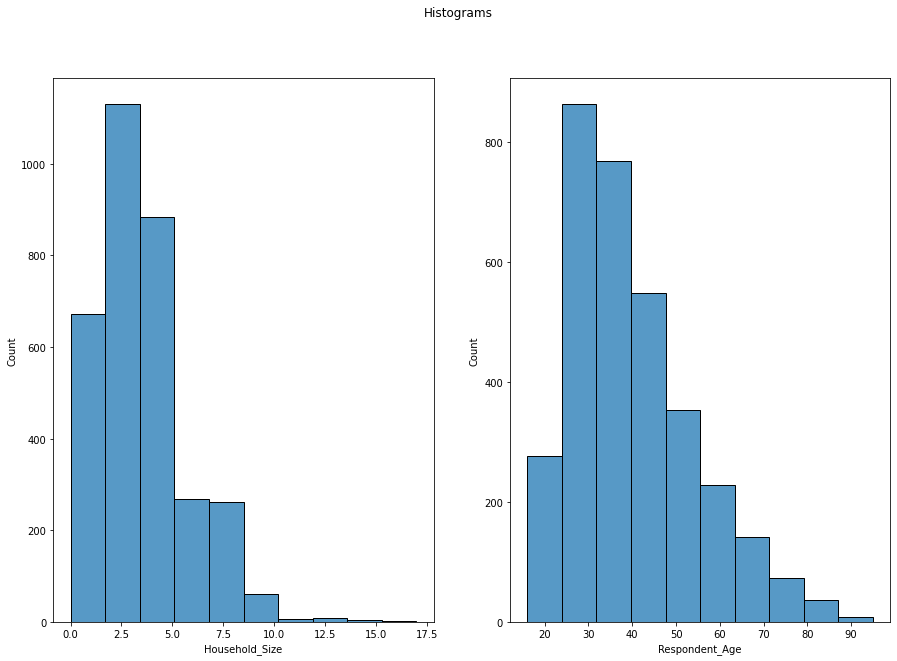

In [131]:
#visualisation of the numerical data with bank access using histogram
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 10))
fig.suptitle('Histograms')
sns.histplot( data = Financial_yes,x='Household_Size',bins = 10,ax = ax1)
sns.histplot( data = Financial_yes,x='Respondent_Age',bins=10,ax = ax2)

In [132]:
#finding the univariate summaries for those with bank account access
Financial_yes.describe()
#the mean for household size and respondent age is 3.56 and 39.60 respectively and the standard deviation is 2.21 and 14.34 respectively meaning that the respondent age are more spread from the mean than the household size data

,Household_Size,Respondent_Age
count,3297.000000,3297.000000
mean,3.558993,39.605702
std,2.215401,14.344172
min,0.000000,16.000000
25%,2.000000,29.000000
50%,3.000000,36.000000
75%,5.000000,48.000000
max,17.000000,95.000000


In [135]:
#computing the skweness for the numerical data with bank account
Financial_yes['Household_Size'].skew()
#the Household size data has a skweness of 0.97 meaning  it is moderately skwed to the right
Financial_yes['Respondent_Age'].skew()
#the respondent age has a skweness of 0.94 meaning it is moderately skwed to the right

0.9357422832248766

In [138]:
#computing kurtosis for the numerical data with bank account
Financial_yes['Household_Size'].kurt()
#the household size has a kurtosis of 1.24 meaning leptpkurtic meaning there is presence of outliers but wont be removed due to the possibility of having large household
Financial_yes['Respondent_Age'].kurt()
#the Respondent age has a kurtosis of 0.47 which is more than 0 meaning it is leptokurtic and it has outliers but wont be remove since there is possibility of the respondent being very old

0.46628468620455177

In [140]:
#computing the mode for the numerical data with bank account
Financial_yes['Household_Size'].mode()
#the mode of household size is 1 meaning most household consist of 1 members for those with bank account
Financial_yes['Respondent_Age'].mode()
#the mode of respondent age is 30 meaning most respondents aged 30 had bank account

0    30.0
dtype: float64

In [141]:
#computing the median for the numerical data with bank account
Financial_yes.median()
#the median household size is 3 and the respondent age is 36 for those with bank account

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Household_Size     3.0
Respondent_Age    36.0
dtype: float64

In [143]:
#computing the interquantile range for the numerical data with bank account
Q1 = Financial_yes['Household_Size'].quantile(0.25)
Q3 = Financial_yes['Household_Size'].quantile(0.75)
interquatile_household = Q3 - Q1
interquatile_household
#the interquantile range for the household size is 3 which is the difference between the first and the third quantile
Financial_yes['Respondent_Age'].quantile(0.75)-Financial_yes['Respondent_Age'].quantile(0.25)
#the interquantile range for the respondent age is 19 meaning the difference between the 3rd quantile and the 1st quantile

19.0

In [147]:
#computing the range for the numerical data which has bank account
Financial_yes['Household_Size'].max()-Financial_yes['Household_Size'].min()
#the range of the household size with bank account is 17 that is the difference between the largest and smallest household
Financial_yes['Respondent_Age'].max()-Financial_yes['Respondent_Age'].min()
#the range of the respondent age with bank account is 79 that is the difference between the oldest and the youngest respondent

79.0

In [208]:
Financial_no = Financial_noduplicates[Financial_noduplicates['Bank_Account'] == 'No']
Financial_no.head()


#creating frequency table for the categoricacal data
Financial_no.Country.value_counts()
#Rwanda recorded the highest number of people without bank accounts
Financial_no.Marital_Status.value_counts()
#married people recorded the highest number of people without bank account  hence need to educate married people the benefits of having bank account
Financial_no.Cellphone_Access.value_counts()
#people who had cellphone access had the highest number of without  bank accounts thus  a need to reach out to people on benefits of having bank account through social media since most people with phones access social media
Financial_no.Gender_Of_Respondent.value_counts()
#more female didnt have bank account access hence the need to empower women and enlighthen them on  the benefits 
Financial_no.Type_Of_Location.value_counts()
#more people in the rural had no bank account
Financial_no.Type_Of_Job.value_counts()
#self employed people recorded the highest number of no bank accounts
Financial_no.Level_Of_Education.value_counts()
#most people with primary eduaction had no bank account
Financial_no.Relationship_Head.value_counts()
#most household head had no bank account

Self employed                   5517
Informally employed             5110
Farming and Fishing             4788
Remittance Dependent            2269
Other Income                     881
No Income                        605
Formally employed Private        481
Government Dependent             197
Dont Know/Refuse to answer       111
Formally employed Government      87
Name: Type_Of_Job, dtype: int64

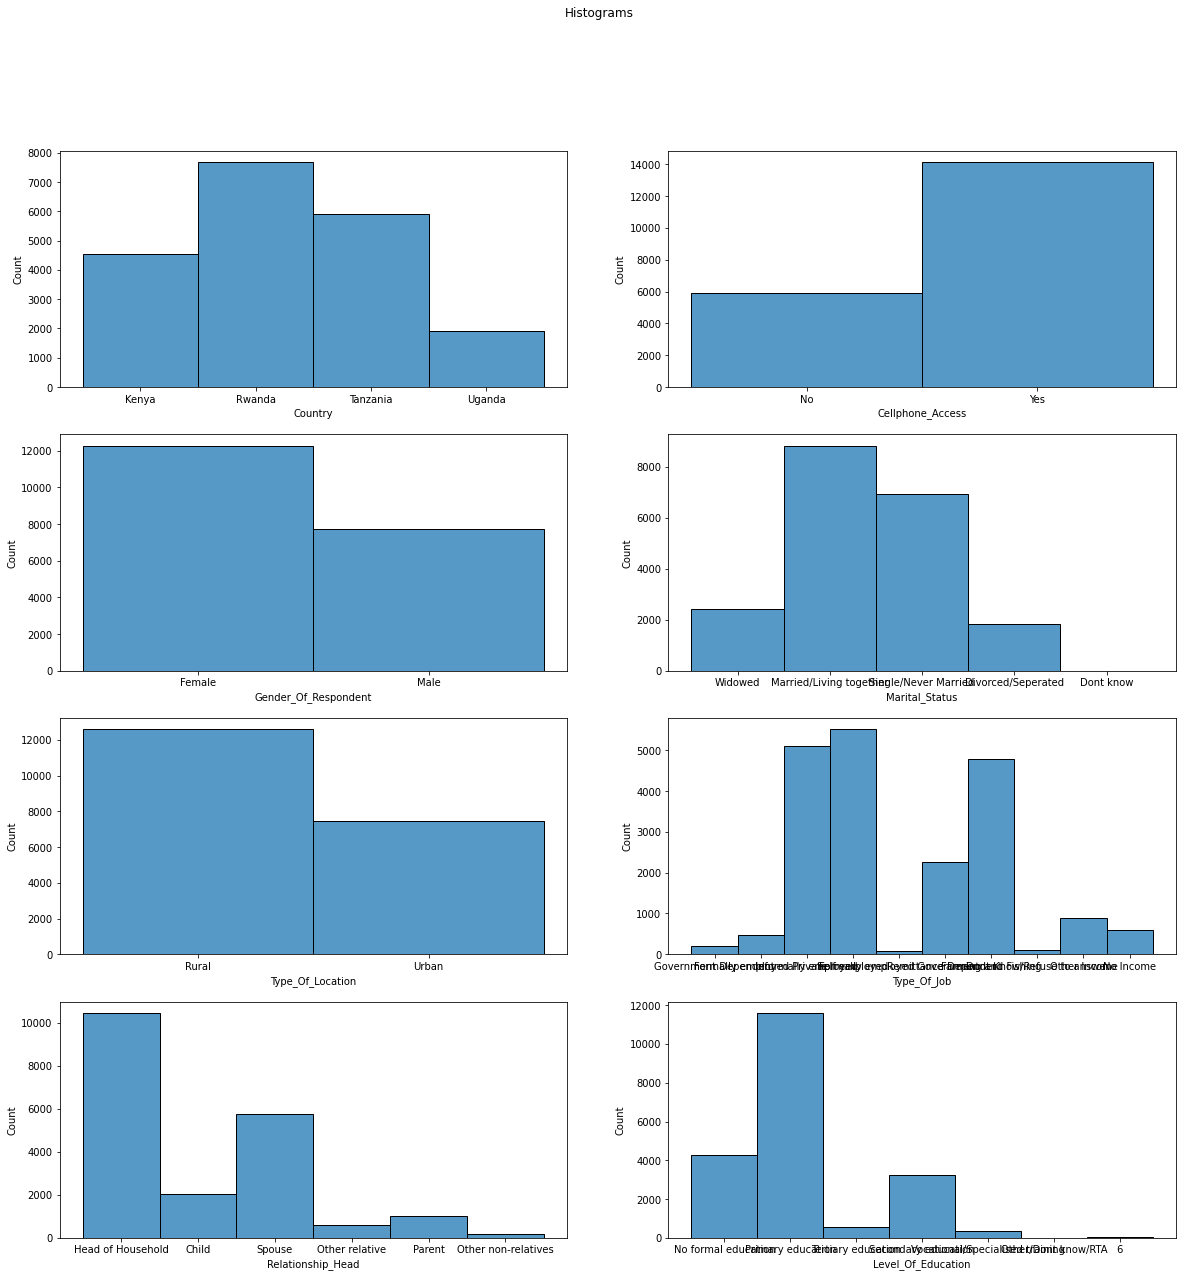

In [158]:
#visualisation of the frequency table for the categorical data which had no bank account

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(20,20),)
fig.suptitle('Histograms')
sns.histplot(data=Financial_no, x= 'Country',ax = ax1,binwidth=0.9)
sns.histplot(data=Financial_no,x='Cellphone_Access',ax= ax2)
sns.histplot(data=Financial_no,x='Gender_Of_Respondent',ax= ax3)
sns.histplot(data=Financial_no,x='Marital_Status',ax=ax4)
sns.histplot(data=Financial_no,x='Type_Of_Location',ax=ax5)
sns.histplot(data=Financial_no,x='Type_Of_Job',ax = ax6)
sns.histplot(data=Financial_no,x='Relationship_Head',ax =ax7)
sns.histplot(data=Financial_no,x='Level_Of_Education',ax= ax8)


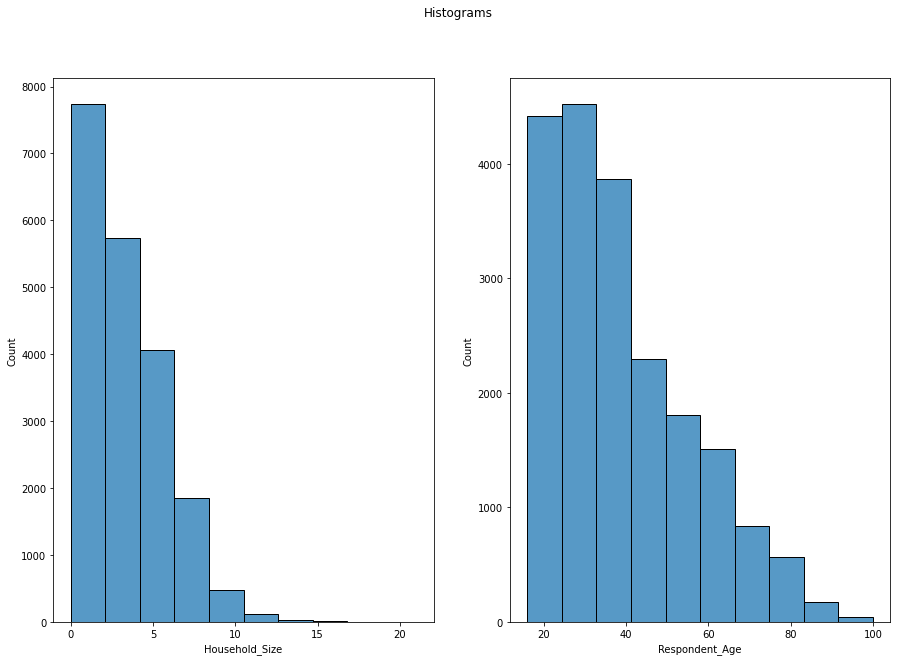

In [159]:
#visualisation of the numerical data with no bank access using histogram
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 10))
fig.suptitle('Histograms')
sns.histplot( data = Financial_no,x='Household_Size',bins = 10,ax = ax1)
sns.histplot( data = Financial_no,x='Respondent_Age',bins=10,ax = ax2)

In [160]:
#finding the univariate summaries for those with no bank account access
Financial_no.describe()
#the mean for household size and respondent age is 3.71 and 38.67 respectively and the standard deviation is 2.29 and 16.84 respectively meaning that the respondent age are more spread from the mean than the household size data

,Household_Size,Respondent_Age
count,20046.000000,20046.000000
mean,3.709967,38.673900
std,2.291174,16.847437
min,0.000000,16.000000
25%,2.000000,25.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [162]:
#computing the skweness for the numerical data with no bank account
Financial_no['Household_Size'].skew()
#the Household size data has a skweness of 0.97 meaning  it is moderately skwed to the right
Financial_no['Respondent_Age'].skew()
#the respondent age has a skweness of 0.83 meaning it is moderately skwed to the right

0.8344560755514276

In [164]:
#computing kurtosis for the numerical data with no bank account
Financial_no['Household_Size'].kurt()
#the household size has a kurtosis of 1.14 meaning leptpkurtic meaning there is presence of outliers but wont be removed due to the possibility of having large household
Financial_no['Respondent_Age'].kurt()
#the Respondent age has a kurtosis of 0.04 which is more than 0 meaning it is leptokurtic and it has outliers but wont be remove since there is possibility of the respondent being very old

0.042372381050590935

In [166]:
#computing the mode for the numerical data with no bank account
Financial_no['Household_Size'].mode()
#the mode of household size is 2 meaning most household consist of2 members for those with had no bank account
Financial_no['Respondent_Age'].mode()
#the mode of respondent age is 30 meaning most respondents aged 30 had no bank account thus young people need to be educated on need to have bank accounts

0    30.0
dtype: float64

In [167]:
#computing the median for the numerical data with no bank account
Financial_no.median()
#the median household size is 3 and the respondent age is 35 for those with no bank account

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Household_Size     3.0
Respondent_Age    35.0
dtype: float64

In [170]:
#computing the interquantile range for the numerical data with  no bank account
Q1 = Financial_no['Household_Size'].quantile(0.25)
Q3 = Financial_no['Household_Size'].quantile(0.75)
interquatile_household = Q3 - Q1
interquatile_household
#the interquantile range for the household size is 3 which is the difference between the first and the third quantile
Financial_no['Respondent_Age'].quantile(0.75)-Financial_no['Respondent_Age'].quantile(0.25)
#the interquantile range for the respondent age is 24 meaning the difference between the 3rd quantile and the 1st quantile

24.0

In [172]:
#computing the range for the numerical data with no  bank account
Financial_no['Household_Size'].max()-Financial_no['Household_Size'].min()
#the range of the household size with no bank account is 21 that is the difference between the largest and smallest household
Financial_no['Respondent_Age'].max()-Financial_no['Respondent_Age'].min()
#the range of the respondent age with no bank account is 84 that is the difference between the oldest and the youngest respondent

84.0

### Bivariate Analysis

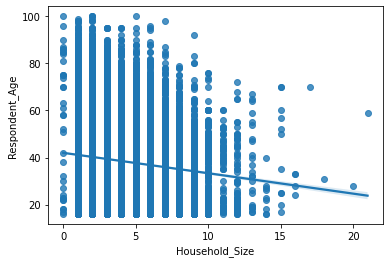

In [173]:
#plotting scatter plot for the numerical data 
sns.regplot( x= Financial_noduplicates['Household_Size'], y = Financial_noduplicates['Respondent_Age'],fit_reg=True)
#the scatter plot shows a inverse relationship between household size and respondent age

In [174]:
#computing correlation for numerical data
Financial_noduplicates['Household_Size'].corr(Financial_noduplicates['Respondent_Age'], method = 'pearson')
#the correlation coefficient is -0.11 which is a weak negative correlation meaning has the household size increases the respondent age decreases

-0.11970919507762415

# Multivariate Analysis

In [42]:
#converting our categorical data into numerical
#house_enc ={'Relationship_Head':{'Head of Household':1,'Spouse':2,'Child':3,'Parent':4 ,'Other relative':5,'Other non-relatives':6}}   
#Financial_noduplicates.replace(house_enc,inplace= True)
#job_enc ={'Level_Of_Education':{'Primary education':1,'No formal education':2,'Secondary education':3, 'Tertiary education':4, 'Vocational/Specialised training':5,'6':6 ,'Other/Dont know/RTA':7 }} 
#Financial_noduplicates.replace(job_enc,inplace=True) 
#Financial_noduplicates.head() 
#loc_en = {'Type_Of_Location':{'Rural':0,'Urban':1}} 
#Financial_noduplicates.replace(loc_en,inplace = True)
#Financial_noduplicates.head()
#cell_en ={'Cellphone_Access':{'Yes':0,'No':1}}
#Financial_noduplicates.replace(cell_en,inplace= True)
Financial_noduplicates.head()
#gen_en ={'Gender_Of_Respondent':{'Female':0,'Male':1}}
#Financial_noduplicates.replace(gen_en,inplace= True)
#ariral_gen = {'Marital_Status':{'Married/Living together':1,'Single/Never Married':2,'Widowed':3,'Divorced/Seperated':4,'Dont know':5}}
#Financial_noduplicates.replace(mariral_gen,inplace=True)
#job_en ={'Type_Of_Job':{'Self employed':1,'Informally employed':2,'Farming and Fishing':3,'Remittance Dependent':4,'Other Income':5,'No Income':6,'Formally employed Private':7,'Government Dependent':8,'Dont Know/Refuse to answer':9,'Formally employed Government':10   }}
#Financial_noduplicates.replace(job_en,inplace=True)

,Country,Year,Uniqueid,Bank_Account,Type_Of_Location,Cellphone_Access,Household_Size,Respondent_Age,Gender_Of_Respondent,Relationship_Head,Marital_Status,Level_Of_Education,Type_Of_Job
0,Kenya,2018,uniqueid_1,Yes,0,0,3.0,24.0,0,2,1,3,1
1,Kenya,2018,uniqueid_2,No,0,1,5.0,70.0,0,1,3,2,8
2,Kenya,2018,uniqueid_3,Yes,1,0,5.0,26.0,1,5,2,5,1
3,Kenya,2018,uniqueid_4,No,0,0,5.0,34.0,0,1,1,1,7
4,Kenya,2018,uniqueid_5,No,1,1,8.0,26.0,1,3,2,1,2


In [43]:
#dropping the columns we dont need
Financial_clean = Financial_noduplicates.drop(['Country','Year','Uniqueid'],axis =1)
Financial_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bank_Account          23343 non-null  object 
 1   Type_Of_Location      23343 non-null  int64  
 2   Cellphone_Access      23343 non-null  int64  
 3   Household_Size        23343 non-null  float64
 4   Respondent_Age        23343 non-null  float64
 5   Gender_Of_Respondent  23343 non-null  int64  
 6   Relationship_Head     23343 non-null  int64  
 7   Marital_Status        23343 non-null  int64  
 8   Level_Of_Education    23343 non-null  int64  
 9   Type_Of_Job           23343 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 2.0+ MB


In [44]:
#analysing data using the PCA
# we divide data into features and corresponding label
# we store feature set in X and label in y
X = Financial_clean.drop('Bank_Account', 1)
X
y = Financial_clean['Bank_Account']

In [45]:
#we now split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [46]:
#scalar normalization to normalize the feature set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [47]:
#applying the PCA analysis
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

In [48]:
#finding the explained variance in order to determine the number of PC
explained_variance = pca.explained_variance_ratio_
explained_variance
#we will use 7 components because it variance add up to 95%

array([0.18217691, 0.16656364, 0.14401836, 0.12279503, 0.09671598,
       0.09255807, 0.07734738, 0.06945443, 0.04837021])

In [49]:
#we use 4 components since it variance add up 88$ which is the highest

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [53]:
#training our model and using it to make predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [52]:
#we now test the accuracy of our model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test,y_pred ))
#it is 87.85% accurate


[[7967   53]
 [1082  236]]
Accuracy 0.8784536303276933
